In [ ]:
# Data Source
# CIFAR10 Dataset - https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
# Import required libraries and modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import datasets
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
# Loading the CIFAR Data

(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [11]:
# target label
np.unique(Y_test)  # sparse_categorical_crossentropy

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# output class

# [dog, cat] - [1, 0] - Binary cross entropy
# [dog, cat, parrot] - [1, 0, 0] - categorical cross entropy
# [dog, cat, parrot, fish] - [0, 1, 2, 3] - sparse categorical cross entropy

In [12]:
# reshape the target label to 1D
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
print(Y_train.ndim, Y_test.ndim, sep='\n')

1
1


In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
# pixel of first image
X_train[0, :]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

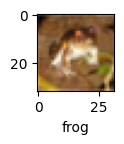

In [21]:
# printing the first pixel as image
plt.figure(figsize=(10, 1))
plt.imshow(X_train[0, :])
plt.xlabel(classes[Y_train[0]])
plt.show()

In [22]:
# function to get image
def sample_img(X, y, val):
    plt.figure(figsize=(10, 1))
    plt.imshow(X[val, :])
    plt.xlabel(classes[y[val]])
    plt.show()

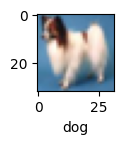

In [25]:
sample_img(X_train, Y_train, 4000)

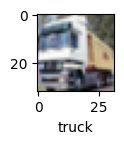

In [27]:
sample_img(X_train, Y_train, 1)

In [28]:
# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0

In [29]:
# Model Building

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')      # output layer
])

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.4348 - accuracy: 0.4828
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0707 - accuracy: 0.6207
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9277 - accuracy: 0.6743
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8163 - accuracy: 0.7144
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7377 - accuracy: 0.7424
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6649 - accuracy: 0.7682
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5988 - accuracy: 0.7895
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5315 - accuracy: 0.8109
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4744 - accuracy: 0.8328
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.42

In [33]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0207 - accuracy: 0.7022


[1.0206512212753296, 0.7021999955177307]

In [34]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [35]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 4, 1]

In [36]:
Y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [52]:
def act_to_pred(val):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_test[val, :])
    plt.xlabel(classes[Y_test[val]])
    plt.show()
    print('The predicted image label is:',classes[y_class[val]])

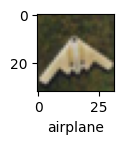

The predicted image label is: dog


In [56]:
act_to_pred(52)